In [1]:
import requests as r
import os

In [2]:
from dotenv import load_dotenv

load_dotenv(dotenv_path='/home/rebyidd/OneDrive/Environment_Variables/spotify.env')  

True

In [3]:
spotify_id = os.environ['client_id']
spotify_secret = os.environ['client_secret']

In [4]:
url_token = "https://accounts.spotify.com/api/token"
data = {
    'grant_type': 'client_credentials',
    'client_id': spotify_id,
    'client_secret': spotify_secret,
}
token = r.post(url_token, data=data)

In [5]:
token.status_code

200

In [6]:
token = token.json()

print()

In [9]:
headers = {
    'Authorization': f'Bearer {token["access_token"]}',
}

In [10]:
# death_artist_id = '4f5V3PQ66nIrBCqugJtaGn'


# response = r.get(f'https://api.spotify.com/v1/artists/{death_artist_id}/top-tracks', headers=headers)

# response

# json_death = response.json()

# json_death.keys()


# album_names = []
# for i in range(len(json_death['items'])):
#     album_names.append(json_death['items'][i]['name'])

# response

# album_names

# json_death['items'][0]

# genre_seeds = r.get('https://api.spotify.com/v1/recommendations/available-genre-seeds', headers=headers)

# genre_seeds

In [21]:
genre = "pop"
limit = '50'
params = {
        'q': f'genre:{genre}',
        'type':'artist',
        'limit': limit,
        'offset': '10'# Optional: Adjust based on your location
}

response = r.get('https://api.spotify.com/v1/search', params=params, headers=headers)

In [22]:
response.status_code

200

In [23]:
genre_response = response.json()['artists']

In [24]:
keys = ['id', 'artist_name', 'popularity_score', 'followers', 'genre'] 

d = {key:[] for key in keys}

for i in range(len(genre_response['items'])):

    block = genre_response['items'][i]
    d['id'].append(block['id'])
    d['artist_name'].append(block['name'])
    d['popularity_score'].append(block['popularity'])
    d['followers'].append(block['followers']['total'])
    d['genre'].append(block['genres'])
    
    
    

In [25]:
import pandas as pd

df = pd.DataFrame(d)

In [26]:
df.corr()

,popularity_score,followers
popularity_score,1.000000,0.597356
followers,0.597356,1.000000


In [27]:
df.sort_values(by='followers', ascending=False)

,id,artist_name,popularity_score,followers,genre
20,6eUKZXaKkcviH0Ku9w2n3V,Ed Sheeran,88,118562269,[soft pop]
5,1uNFoZAHBGtllmzznpCI3s,Justin Bieber,91,80194460,[]
1,5pKCCKE2ajJHZ9KAiaK11H,Rihanna,90,64943631,[]
49,4dpARuHxo51G3z768sgnrY,Adele,85,61800844,[soft pop]
10,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,90,56123314,[]
22,53XhwfbYqKCa1cC15pYq2q,Imagine Dragons,87,56094081,[]
0,246dkjvS1zLTtiykXe5h60,Post Malone,89,46310296,[]
30,6M2wZ9GZgrQXHCFfjv46we,Dua Lipa,87,45415489,[pop]
2,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,91,43817602,[]
41,04gDigrS5kc9YWfZHwBETP,Maroon 5,86,43811648,[pop]


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

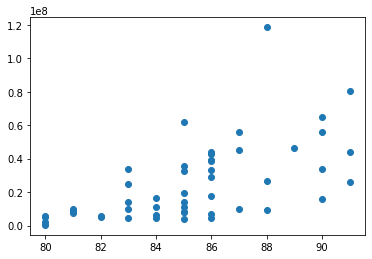

In [29]:
plt.scatter(df['popularity_score'], df['followers'],)
plt.show()

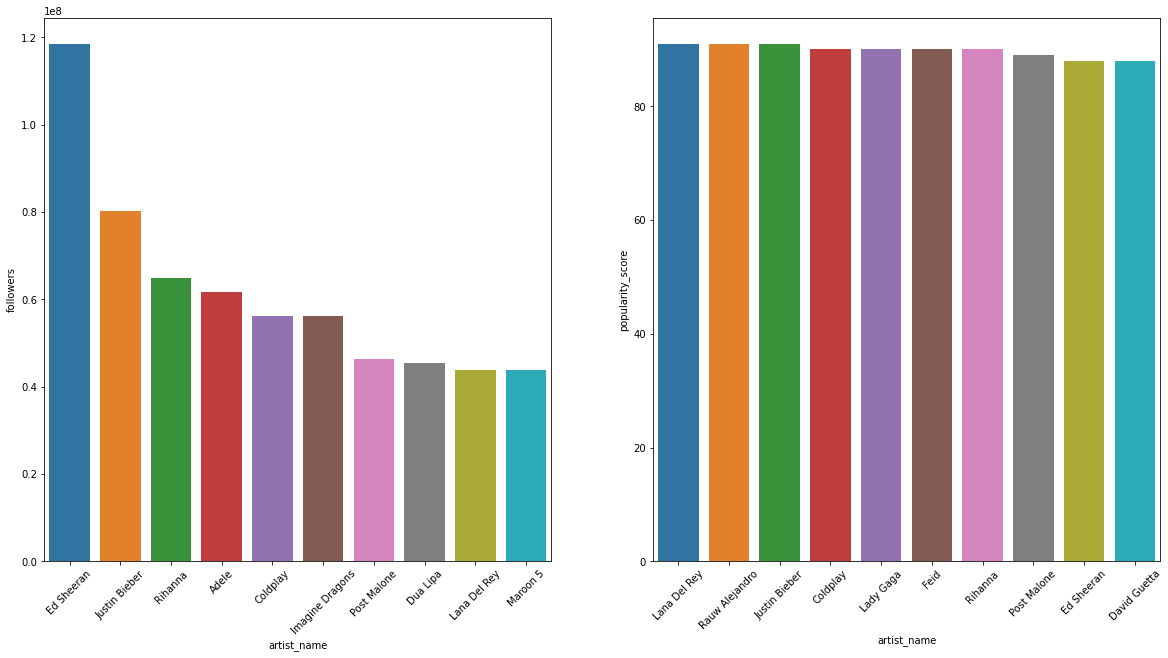

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(20,10))

sns.barplot(data=df.sort_values(by='followers', ascending=False).head(10), x='artist_name', y='followers', ax=axs[0])
sns.barplot(data=df.sort_values(by='popularity_score', ascending=False).head(10), x='artist_name', y='popularity_score', ax=axs[1])
for label in axs[0].get_xticklabels():
    label.set_rotation(45)

for label in axs[1].get_xticklabels():
    label.set_rotation(45)
plt.show()